## 1.GAN原理
生成对抗网络包含了两个子网络：生成网络(Generator，简称 G)和判别网络(Discriminator，简称 D)，其中生成网络 G 负责学习样本的真实分布，判别网络 D 负责将生成网络采样的样本与真实样本区分开来。

## 2.网络架构
**生成网络G(𝒛)**: 生成网络 G 和自编码器的 Decoder 功能类似，从先验分布$𝑝_𝒛(∙)$中采样隐藏变量$𝒛\sim 𝑝𝒛(∙)$，通过生成网络 G 参数化的$𝑝_𝑔(𝒙|𝒛)$分布，获得生成样本$𝒙\sim 𝑝_𝑔(𝒙|𝒛)$其中隐藏变量𝒛的先验分布$𝑝_𝒛(∙)$可以假设为某中已知的分布，比如多元均匀分布$𝑧\sim Uniform(−1,1)$.  
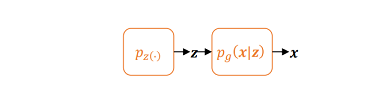

从输入输出层面来看，生成器 G 的功能是将隐向量𝒛通过神经网络转换为样本向量$𝒙_𝑓$，下标𝑓代表假样本(Fake samples)。  
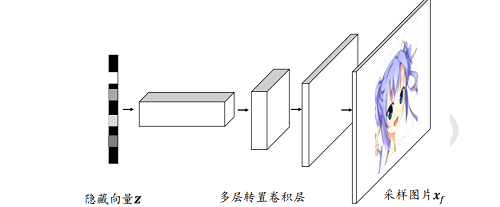

**判别网络D(𝒙)**:判别网络和普通的二分类网络功能类似，它接受输入样本𝒙的数据集，包含了采样自真实数据分布$𝑝_𝑟(∙)$的样本$𝒙_𝑟\sim 𝑝_𝑟(∙)$，也包含了采样自生成网络的假样本$𝒙_𝑓\sim 𝑝_𝑔(𝒙|𝒛)$，$𝒙_𝑟$和$𝒙_𝑓$共同组成了判别网络的训练数据集。判别网络输出为𝒙属于真实样本的概率$𝑃(𝒙为真|𝒙)$，我们把所有真实样本$𝒙_𝑟$的标签标注为真(1)，所有生成网络产生的样本$𝒙_𝑓$标注为假(0)，**通过最小化判别网络 D 的预测值与标签之间的误差来优化判别网络参数**.

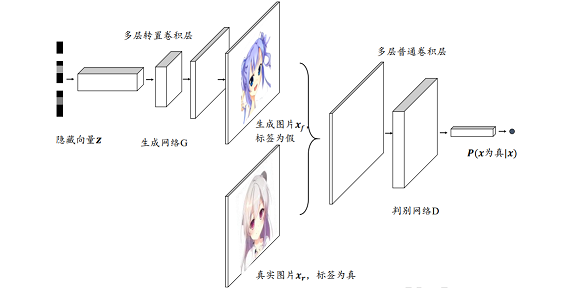

## 3.网络训练
对于判别网络 D，它的目标是能够很好地分辨出真样本$𝒙_𝑟$与假样本$𝒙_𝑓$。以图片生成为例，它的目标是最小化图片的预测值和真实值之间的交叉熵损失函数：  
$$\underset {\theta}{min} ~ ℒ = CE(𝐷_𝜃(𝒙_𝑟),𝑦_𝑟,𝐷_𝜃(𝒙_𝑓), 𝑦_𝑓)$$
其中$𝐷_𝜃(𝒙_𝑟)$代表真实样本$𝒙_𝑟$在判别网络$𝐷_𝜃$的输出，𝜃为判别网络的参数集，$𝐷_𝜃(𝒙_𝑓)$为生成样本$𝒙_𝑓$在判别网络的输出，$𝑦_𝑟$为$𝒙_𝑟$的标签，由于真实样本标注为真，故$𝑦_𝑟$ = 1，$𝑦_𝑓$为生成样本的$𝒙_𝑓$的标签，由于生成样本标注为假，故$𝑦_𝑓$ = 0。CE函数代表交叉熵损失函数CrossEntropy.  
二分类问题的交叉熵损失函数定义为：  
$$ℒ = −\sum\limits_{𝒙_𝑟\sim 𝑝_𝑟(∙)}{log𝐷_𝜃(𝒙_𝑟)}−\sum\limits_{x_f\sim p_g(∙)}{ log (1 − 𝐷_𝜃(𝒙_𝑓))}$$
因此判别网络 D 的优化目标是：  
$$𝜃^∗ = \underset {\theta}{argmin} ~ −\sum\limits_{𝒙_𝑟\sim 𝑝_𝑟(∙)}{log𝐷_𝜃(𝒙_𝑟)}−\sum\limits_{x_f\sim p_g(∙)}{ log (1 − 𝐷_𝜃(𝒙_𝑓))}$$
把$\underset {\theta}{min}ℒ$问题转换为$\underset {\theta}{max}−ℒ$，并写成期望形式:  
$$𝜃^∗ = \underset {\theta}{argmax} ~ 𝔼_{𝒙_𝑟\sim 𝑝_𝑟(∙)}log𝐷_𝜃(𝒙_𝑟) + 𝔼_{𝒙_𝑓\sim 𝑝_𝑔(∙)}log (1 − 𝐷_𝜃(𝒙_𝑓))$$




对于生成网络G(𝒛)，我们希望$𝒙_𝑓$ = 𝐺(𝒛)能够很好地骗过判别网络 D，假样本$𝒙_𝑓$在判别网络的输出越接近真实的标签越好。也就是说，在训练生成网络时，希望判别网络的输出𝐷(𝐺(𝒛))越逼近 1 越好，最小化𝐷(𝐺(𝒛))与 1 之间的交叉熵损失函数： 
$$\underset{𝜙}{min} ~ ℒ = 𝐶𝐸 (𝐷 (𝐺_𝜙(𝒛)),1) = −log𝐷(𝐺_𝜙(𝒛))$$  
把$\underset{𝜙}{min} ~ ℒ$问题转换成$\underset{𝜙}{max} ~ -ℒ$，并写成期望形式： 
$$𝜙^∗ = \underset{𝜙}{argmax} ~ 𝔼_{𝒛\sim𝑝_𝑧(∙)}log𝐷 (𝐺_𝜙(𝒛))$$  
再次等价转化为：  
$$𝜙^∗ = \underset{𝜙}{argmin} ~ ℒ = 𝔼_{𝒛\sim 𝑝_𝑧(∙)}log[1−𝐷(𝐺_𝜙(𝒛))] $$
其中𝜙为生成网络 G 的参数集，可以利用梯度下降算法来优化参数𝜙.

### 统一目标函数
我们把判别网络的目标和生成网络的目标合并，写成min − max博弈形式：  
$\underset{𝜙}{min} ~ \underset{𝜃}{max} ~ ℒ(𝐷,𝐺) = 𝔼_{𝒙\sim 𝑝_𝑟(∙)}log𝐷_𝜃(𝒙) + 𝔼_{𝒙_𝑓\sim 𝑝_𝑔(∙)}log[1−𝐷_\theta(x_f)]$  
$ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~= 𝔼_{𝒙\sim 𝑝_𝑟(∙)}log𝐷_𝜃(𝒙) + 𝔼_{𝒛\sim 𝑝_𝑧(∙)}log[1−𝐷_\theta(𝐺_𝜙(𝒛))]$

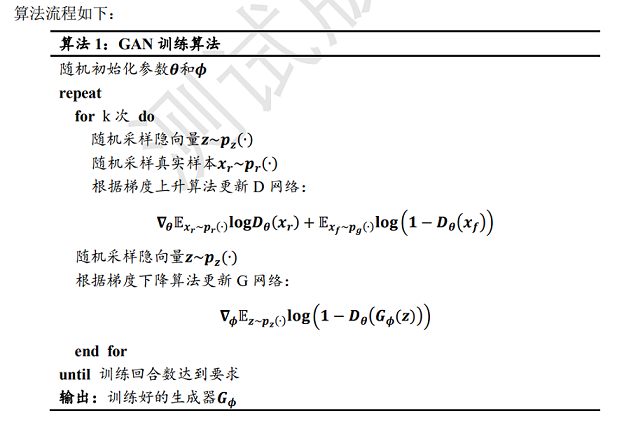

## 4.GAN 变种
**原始 GAN 模型在图片生成效果上并不突出，和 VAE 差别不明显**，此时并没有展现出它强大的分布逼近能力。但是由于 GAN 在理论方面较新颖，实现方面也有很多可以改进的地方，大大地激发了学术界的研究兴趣。

### 4.1 DCGAN
最初始的 GAN 网络主要基于全连接层实现生成器 G 和判别器 D 网络，由于图片的维度较高，网络参数量巨大，训练的效果并不优秀。DCGAN提出了使用转置卷积层实现的生成网络，普通卷积层来实现的判别网络，大大地降低了网络参数量，同时图片的生成效果也大幅提升，展现了 GAN 模型在图片生成效果上超越 VAE 模型的潜质。

### 4.2 InfoGAN
InfoGAN尝试使用无监督的方式去学习输入𝒙的可解释隐向量𝒛的表示方法(Interpretable Representation)，即希望隐向量𝒛能够对应到数据的语义特征.**希望模型能够学习到这些分离的(Disentangled)可解释特征表示方法，从而可以通过人为控制隐变量来生成指定内容的样本.**  
分离的可解释特征有什么好处呢？它可以让神经网络的可解释性更强，比如𝒛包含了一些分离的可解释特征，那么我们可以通过仅仅改变这一个位置上面的特征来获得不同语义的生成数据，**通过将“戴眼镜男士”与“不戴眼镜男士”的隐向量相减，并与“不戴眼镜女士”的隐向量相加，可以生成“戴眼镜女士”的生成图片**。  
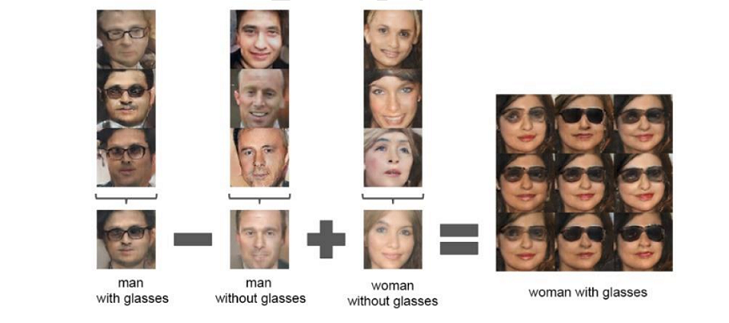

### 4.3 CycleGAN
CycleGAN是华人朱俊彦提出的无监督方式进行图片风格相互转换的算法，由于算法清晰简单，实验效果完成的较好，这项工作受到了很多的赞誉。CycleGAN 基本的假设是，如果由图片 A 转换到图片 B，再从图片 B 转换到A′，那么A′应该和 A 是同一张图片。  
因此除了设立标准的 GAN 损失项外，CycleGAN 还增设了循环一致性损失(Cycle Consistency Loss)，来保证A′尽可能与 A 逼近。  
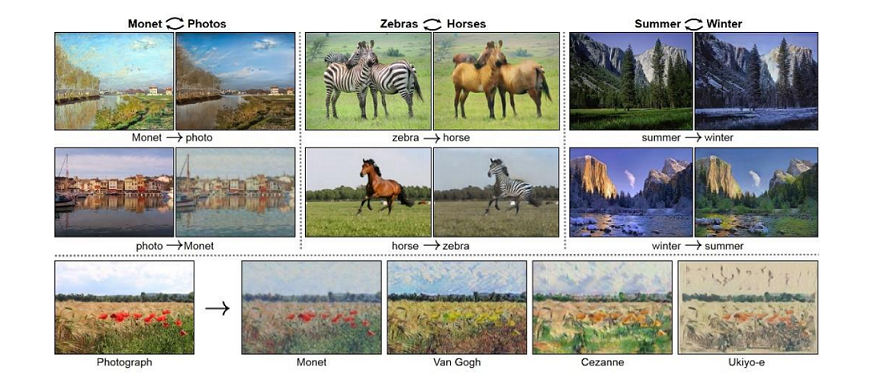

### 4.4 WGAN
**GAN的训练问题一直被诟病，很容易出现训练不收敛和模式崩塌的现象**.WGAN从理论层面分析了原始的GAN使用JS散度存在的缺陷，并提出了可以使用 Wasserstein距离来解决这个问题。在WGAN-GP中，作者提出了通过添加梯度惩罚项，从工程层面很好的实现了WGAN算法，并且实验性证实了WGAN训练稳定的优点。

### 4.5 Self-Attention GAN
Attention机制在自然语言处理(NLP)中间已经用得非常广泛了，Self-Attention GAN(SAGAN)借鉴了 Attention 机制，提出了基于自注意力机制的 GAN 变种。SAGAN 把图片的逼真度指标：Inception score，从最好的 36.8 提升到 52.52，Frechet Inception distance，从 27.62 降到 18.65。从图片生成效果上来看，SAGAN 取得的突破是十分显著的，同时也启发业界对自注意力机制的关注。  
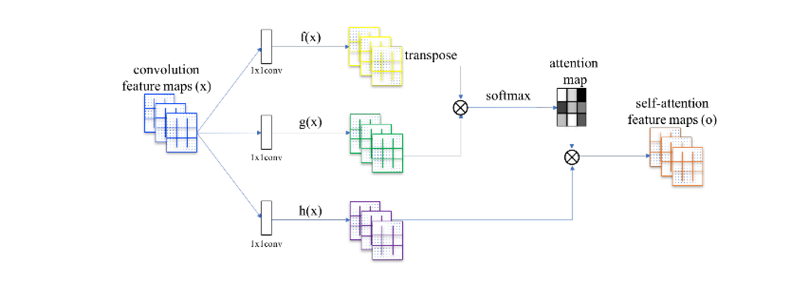

### 4.6 BigGAN
在 SAGAN 的基础上，BigGAN尝试将 GAN 的训练扩展到大规模上去，利用正交正则化等技巧保证训练过程的稳定性。BigGAN 的意义在于启发人们，GAN 网络的训练同样可以从大数据、大算力等方面受益。BigGAN 图片生成效果达到了前所未有的高度：Inception score 记录提升到 166.5(提高了 52.52)；Frechet Inception Distance 下降到 7.4，降低了 18.65.

## 5.纳什均衡
在我们从理论层面进行分析，通过博弈学习的训练方式，生成器 G 和判别器 D 分别会达到什么平衡状态。具体地，我们将探索以下两个问题：  
❑ 固定 G，D 会收敛到什么最优状态$𝐷^∗$?  
❑ 在D达到最优状态$𝐷^∗$后，G会收敛到什么状态？  

GAN优化目标：  
$\underset{𝜙}{min} ~ \underset{𝜃}{max} ~ ℒ(𝐷,𝐺) = 𝔼_{𝒙\sim 𝑝_𝑟(∙)}log𝐷_𝜃(𝒙) + 𝔼_{𝒙_𝑓\sim 𝑝_𝑔(∙)}log[1−𝐷_\theta(x_f)]$  
$ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~= 𝔼_{𝒙\sim 𝑝_𝑟(∙)}log𝐷_𝜃(𝒙) + 𝔼_{𝒛\sim 𝑝_𝑧(∙)}log[1−𝐷_\theta(𝐺_𝜙(𝒛))]$  

### 5.1 判别器状态
当G网络固定GAN的损失函数：  
$ℒ(𝐷,𝐺) = 𝔼_{𝒙\sim 𝑝_𝑟(∙)}log𝐷(𝒙) + 𝔼_{x\sim 𝑝_g(∙)}log[1−𝐷(x)]$  
  
由$𝔼(x)=\int_x ~ p(x)f(x)dx得$  
  
$ℒ(𝐷,𝐺) = \int_x ~ 𝑝_r(𝒙)log(𝐷(𝒙))dx + \int_x ~ 𝑝_𝑔(𝒙)log(1 − 𝐷(𝒙))𝑑x$  
$~ ~ ~ ~ ~ ~  ~ ~ ~ ~ ~ = \int_x ~ 𝑝_r(𝒙)log(𝐷(𝒙)) + 𝑝_𝑔(𝒙)log(1 − 𝐷(𝒙))𝑑x$  

**对于判别器D，优化目标就是最大化$ℒ(𝐷,𝐺)$**,需要找出函数：  
$$𝑓_𝜃 = 𝑝_r(𝒙) log(𝐷_\theta(𝒙))+𝑝_𝑔(𝒙) log(1 − 𝐷_\theta(𝒙))$$
的最大值，其中𝜃为判别器𝐷的网络参数。我们来考虑$𝑓_𝜃$更通用的函数的最大值情况：
$$𝑓(𝑥) = 𝐴 log 𝑥 + 𝐵 log(1 − 𝑥)$$
要求得函数𝑓(𝑥)的最大值。考虑𝑓(𝑥)的导数：  
$\frac{df(x)}{dx}=A\frac{1}{ln10}\frac{1}{x}-B\frac{1}{ln10}\frac{1}{1-x}$  
$ ~ ~ ~ ~ ~ ~ ~ ~ =\frac{1}{ln10}(\frac{A}{x}-\frac{B}{1-x})$

令$\frac{df(x)}{dx}=0$，我们可以求得𝑓(𝑥)函数的极值点：  
$$x=\frac{A}{A+B}$$
因此，可以得知，$𝑓_𝜃$函数的极值点同样为： 
$$𝐷_𝜃 =\frac{𝑝_r(𝒙)}{𝑝_r(𝒙) + 𝑝_𝑔(𝒙)}$$
也就是说，判别器网络$𝐷_𝜃$处于$𝐷_{𝜃^∗}$状态时，$𝑓_𝜃$函数取得最大值，$ℒ(𝐺, 𝐷)$函数也取得最大值。  
现在回到最大化$ℒ(𝐺,𝐷)$的问题，$ℒ(𝐺,𝐷)$的最大值点在：  
$$𝐷_{𝜃^∗} =\frac{A}{A+B}=\frac{𝑝_r(𝒙)}{𝑝_r(𝒙) + 𝑝_𝑔(𝒙)}$$
时取得，此时也是$𝐷_𝜃$的最优状态$𝐷_{𝜃^∗}$。  
此时  
$ℒ(𝐷^*,𝐺) = \int_x ~ 𝑝_r(𝒙)log(\frac{𝑝_r(𝒙)}{𝑝_r(𝒙) + 𝑝_𝑔(𝒙)})dx + \int_x ~ 𝑝_𝑔(𝒙)log(1 − \frac{𝑝_r(𝒙)}{𝑝_r(𝒙) + 𝑝_𝑔(𝒙)})𝑑x$  
$~ ~ ~ ~ ~ ~  ~ ~ ~ ~ ~ = \int_x ~ 𝑝_r(𝒙)log(\frac{𝑝_r(𝒙)}{𝑝_r(𝒙) + 𝑝_𝑔(𝒙)}) + 𝑝_𝑔(𝒙)log(1 − \frac{𝑝_r(𝒙)}{𝑝_r(𝒙) + 𝑝_𝑔(𝒙)})𝑑x$  

###  5.2 生成器状态
当 D 达到最优状态$𝐷^∗$时，我们来考虑此时$𝑝_r(x)$和$𝑝_g(x)$的$JS$散度：   
$𝐷_{𝐽𝑆}(𝑝_𝑟(x)\parallel 𝑝_𝑔(x)) =\frac{1}{2}𝐷_{𝐾𝐿}(𝑝_𝑟(x)\parallel \frac{𝑝_𝑟(x) + 𝑝_𝑔(x)}{2}) +\frac{1}{2}𝐷_{𝐾𝐿}(𝑝_𝑔(x)\parallel \frac{𝑝_𝑟(x) + 𝑝_𝑔(x)}{2})$  
$ ~ ~ ~ ~ ~ ~ ~  ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~  ~ ~ ~  ~ ~ ~  ~ ~ ~ =\frac{1}{2}\int_x ~ p_r(x)log\frac{p_r(x)}{\frac{𝑝_𝑟(x) + 𝑝_𝑔(x)}{2}} ~  ~ dx+\frac{1}{2}\int_x ~ p_g(x)log\frac{p_g(x)}{\frac{𝑝_𝑟(x) + 𝑝_𝑔(x)}{2}} ~ ~ dx$  
  
由于$\int_x ~ p_r(x) ~dx=\int_x ~ p_g(x) ~dx=1$(概率和为1)  
$𝐷_{𝐽𝑆}(𝑝_𝑟(x)\parallel 𝑝_𝑔(x)) =log2 + \frac{1}{2} \Big(\int_x ~ p_r(x)log\frac{p_r(x)}{𝑝_𝑟(x) + 𝑝_𝑔(x)} ~ dx+\int_x ~ p_g(x)log\frac{p_g(x)}{𝑝_𝑟(x) + 𝑝_𝑔(x)} ~ dx\Big)$  
$ ~ ~ ~ ~ ~ ~ ~  ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~  ~ ~ ~  ~ ~ ~  ~ ~ ~ =log2 +\frac{1}{2}  ℒ(𝐷^*,𝐺) $  
  
则$ℒ(𝐷^*,𝐺)=2𝐷_{𝐽𝑆}(𝑝_𝑟(x)\parallel 𝑝_𝑔(x))-2log2$  
**对于生成网络 G 而言，训练目标是最小化$ℒ(𝐺,𝐷^*)$**，考虑到 JS 散度具有性质：  
$$𝐷_{𝐽𝑆}(𝑝_𝑟(x)\parallel 𝑝_𝑔{(x)}) ≥ 0$$
因此$ℒ(𝐺,𝐷^*)$取得最小值仅在$𝐷_{𝐽𝑆}(𝑝_𝑟(x)\parallel 𝑝_𝑔(x)) = 0$时(此时$𝑝_𝑔(x) = 𝑝_𝑟(x)$)，$ℒ(𝐺,𝐷^∗)$取得最小值： 
$$ℒ(𝐺^*,𝐷^*) = −2𝑙𝑜𝑔2$$
此时生成网络$𝐺^∗$的状态是： 
$$𝑝_𝑔(x) = 𝑝_𝑟(x)$$
即$𝐺^∗$的学到的分布$𝑝_𝑔(x)$与真实分布$𝑝_𝑟(x)$一致，网络达到平衡点，此时：  
$$𝐷^∗ =\frac{𝑝_r(𝒙)}{𝑝_r(𝒙) + 𝑝_𝑔(𝒙)}= 0.5$$

### 5.3 纳什均衡点
通过上面的推导，我们可以总结出生成网络G最终将收敛到真实分布，即： 
$$𝑝_𝑔 = 𝑝_𝑟$$
此时生成的样本与真实样本来自同一分布，真假难辨，在判别器中均有相同的概率判定为真或假，即  
$$𝐷(∙) = 0.5$$
此时损失函数为  
$$ℒ(𝐺^*,𝐷^*) = −2𝑙𝑜𝑔2$$

## 6.GAN 训练难题
尽管从理论层面分析了 GAN 网络能够学习到数据的真实分布，但是在工程实现中，常常出现 GAN 网络训练困难的问题，**主要体现在 GAN 模型对超参数较为敏感，需要精心挑选能使模型工作的超参数设定，同时也容易出现模式崩塌现象**。

### 6.1 超参数敏感
超参数敏感是指网络的结构设定、学习率、初始化状态等超参数对网络的训练过程影响较大，**微量的超参数调整将可能导致网络的训练结果截然不同。**  
为了能较好地训练 GAN 网络，DCGAN 论文作者提出了不使用 Pooling 层、多使用Batch Normalization 层、不使用全连接层、生成网络中激活函数应使用ReLU、最后一层使用tanh激活函数、判别网络激活函数应使用 LeakyLeLU 等一系列经验性的训练技巧。但是这些技巧仅能在一定程度上避免出现训练不稳定的现象，并没有从理论层面解释为什么会出现训练困难、以及如果解决训练不稳定的问题.

### 6.2  模式崩塌
**模式崩塌(Mode Collapse)是指模型生成的样本单一，多样性很差的现象。**由于判别器只能鉴别单个样本是否采样自真实分布，并没有对样本多样性进行显式约束，导致生成模型可能倾向于生成真实分布的部分区间中的少量高质量样本，以此来在判别器中获得较高的概率值，而不会学习到全部的真实分布。模式崩塌现象在 GAN 中比较常见，在训练过程中，通过可视化生成网络的样本可以观察到，生成的图片种类非常单一，生成网络总是倾向于生成某种单一风格的样本图片，以此骗过判别器。

## 7.WGAN
WGAN 算法从理论层面分析了 GAN 训练不稳定的原因，并提出了有效的解决方法。那么是什么原因导致了 GAN 训练如此不稳定呢？WGAN 提出是因为 **JS 散度在不重叠的分布𝑝和𝑞上的梯度曲面是恒定为 0 的，从而导致此时 GAN 的训练出现梯度弥散现象，参数长时间得不到更新，网络无法收敛**。

### 7.1 JS散度的缺陷
考虑完全不重叠(𝜃 ≠ 0)的两个分布𝑝和𝑞:  
分布𝑝为：$∀(𝑥, 𝑦) ∈ 𝑝, 𝑥 = 0, 𝑦 ∼ U(0,1)$  
分布𝑞为：$∀(𝑥, 𝑦) ∈ 𝑞, 𝑥 = 𝜃, 𝑦 ∼ U(0,1)$  
其中𝜃 ∈ 𝑅，当𝜃 = 0时，分布𝑝和𝑞重叠，两者相等；当𝜃 ≠ 0时，分布𝑝和𝑞不重叠。  
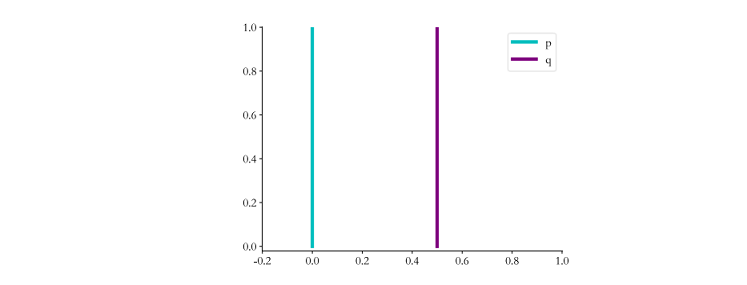

当𝜃 = 0时,两个分布完全重叠,此时  
$$𝐷_{𝐽𝑆}(𝑝\parallel q)=0$$

当当𝜃 ≠ 0时，分布𝑝和𝑞不重叠，此时  
$𝐷_{𝐽𝑆}(𝑝\parallel q)=log2+\frac{1}{2} \Big(\sum\limits_{𝑥 = 0, 𝑦 ∼ U(0,1)} ~ p ~ log\frac{p}{𝑝 + q} +\sum\limits_{𝑥 = 𝜃, 𝑦 ∼ U(0,1)}~ q ~ log\frac{q}{𝑝 + q} \Big)$  
$ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ =log2+\Big(\sum\limits_{𝑥 = 0, 𝑦 ∼ U(0,1)} ~ 1 ~ log\frac{1}{1 + 0} +\sum\limits_{𝑥 = 𝜃, 𝑦 ∼ U(0,1)}~ 1 ~ log\frac{1}{0 + 1} \Big)$  
$ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ =log2$

位于p分布的概率为1时，绝对不可能在q分布上，因为它们并不重叠，所以此时位于q分布的概率为0.

也就是说，**当两个分布完全不重叠时，无论分布之间的距离远近，JS 散度为恒定值log2，此时 JS 散度将无法产生有效的梯度信息；当两个分布出现重叠时，JS 散度才会平滑变动，产生有效梯度信息**；当完全重合后，JS 散度取得最小值 0。由于两个分布没有重叠，生成样本位置处的梯度值始终为 0，无法更新生成网络的参数，从而出现网络训练困难的现象。

因此，**JS 散度在分布𝑝和𝑞不重叠时是无法平滑地衡量分布之间的距离，从而导致此位置上无法产生有效梯度信息，出现 GAN 训练不稳定的情况**。要解决此问题，需要使用一种更好的分布距离衡量标准，使得它即使在分布𝑝和𝑞不重叠时，也能平滑反映分布之间的真实距离变化.

**这里引出一个结论，判别器学习的越好，$p_r$ 和$p_f$不重叠的程度越大，生成器学习图片产生的效果越差。**

### 7.2 EM距离
WGAN 论文发现了 JS 散度导致 GAN 训练不稳定的问题，并引入了一种新的分布距离度量方法：Wasserstein 距离，也叫推土机距离(Earth-Mover Distance，简称 EM 距离)，它表示了从一个分布变换到另一个分布的最小代价，定义为：  
$$𝑊(𝑝, 𝑞) = \underset{𝛾∼∏(𝑝,𝑞)}{inf}𝔼_{(𝑥,𝑦)∼𝛾}[‖𝑥 − 𝑦‖]$$

其中$∏(𝑝, 𝑞)$是分布𝑝和𝑞组合起来的所有可能的联合分布的集合，对于每个可能的联合分布𝛾 ∼ ∏(𝑝, 𝑞)，计算距离$‖𝑥 − 𝑦‖$的期望$𝔼_{(𝑥,𝑦)∼𝛾}[‖𝑥 − 𝑦‖]$，其中(𝑥, 𝑦)采样自联合分布𝛾。不同的联合分布𝛾有不同的期望$𝔼_{(𝑥,𝑦)∼𝛾}[‖𝑥 − 𝑦‖]$，这些期望中的下确界即定义为分布𝑝和𝑞的Wasserstein 距离。其中inf{∙}表示集合的下确界，例如{𝑥|1 < 𝑥 < 3, 𝑥 ∈ 𝑅}的下确界为 1。


wassertein距离就是衡量把概率分布 p“搬到” q 的最小代价。

继续考虑7.1中的例子，我们直接给出分布𝑝和𝑞之间的 EM 距离的表达式：  
$$𝑊(𝑝, 𝑞) = |𝜃|$$
依据7.1 p和q分布绘制出 JS 散度和 EM 距离的曲线，如图所示，可以看到，JS 散度在𝜃 = 0处不连续，其他位置导数均为 0，而 EM 距离总能够产生有效的导数信息，因此 EM 距离相对于JS 散度更适合指导 GAN 网络的训练。
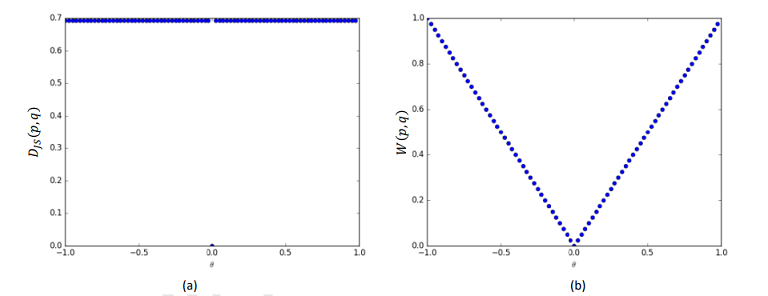

### 7.3 WGAN-GP


考虑到几乎不可能遍历所有的联合分布𝛾去计算距离$‖𝑥 − 𝑦‖$的期望$𝔼_{(𝑥,𝑦)∼𝛾}[‖𝑥 − 𝑦‖]$，因此直接计算生成网络分布$𝑝_𝑔$与真实数据分布$𝑝_𝑟$的$𝑊(𝑝_𝑟, 𝑝_𝑔)$距离是不现实的，WGAN 作者基于 Kantorovich-Rubinstein 对偶性将直接求$𝑊(𝑝_𝑟, 𝑝_𝑔)$转换为求：

$$𝑊(𝑝_𝑟, 𝑝_𝑔) =\frac{1}{𝐾}\underset {||𝑓||_𝐿≤𝐾}{sup}𝔼_{𝑥∼𝑝_𝑟}[𝑓(𝑥)] − 𝔼_{𝑥∼𝑝_𝑔}[𝑓(𝑥)]$$

其中𝑠𝑢𝑝{∙}表示集合的上确界，||𝑓||𝐿 ≤ 𝐾表示函数𝑓: 𝑅 → 𝑅满足 K-阶 Lipschitz 连续性，即
满足
$$|𝑓(𝑥_1) − 𝑓(𝑥_2)| ≤ 𝐾 ∙ |𝑥_1 − 𝑥_2|$$
于是，我们使用判别网络$𝐷_𝜃(𝒙)$参数化𝑓(𝒙)函数，在$𝐷_𝜃$满足 1 阶-Lipschitz 约束的条件
下，即𝐾 = 1，此时：
$$𝑊(𝑝_𝑟, 𝑝_𝑔) =\underset {||D_\theta||_𝐿≤1}{sup}𝔼_{𝑥∼𝑝_𝑟}[D_\theta(𝑥)] − 𝔼_{𝑥∼𝑝_𝑔}[D_\theta(𝑥)]$$

因此求解𝑊(𝑝𝑟,𝑝𝑔)的问题可以转化为：
$$\underset {𝜃}{max} ~ 𝔼_{𝒙∼𝑝_𝑟}[𝐷_𝜃(𝒙)] − 𝔼_{𝒙∼𝑝_𝑔}[𝐷_𝜃(𝒙)]$$
这就是判别器 D 的优化目标。判别网络函数$𝐷_𝜃(𝒙)$需要满足 1 阶-Lipschitz 约束：
$$∇_{𝒙̂}𝐷(𝒙̂) ≤ 1$$

**公式目的在于判别器应在满足约束的情况下尽可能识别真假图片。**  
**约束的意义在于不让判别器学习的太好，不然学习出来的分布和真实的分布会相差太远，导致GAN训练不稳定。**

在 WGAN-GP 论文中，**作者提出采用增加梯度惩罚项(Gradient Penalty)方法来迫使判别网络满足 1 阶-Lipschitz 函数约束**，同时作者发现将梯度值约束在 1 周围时工程效果更好，因此梯度惩罚项定义为：  
$$GP ≜ 𝔼_{𝒙̂∼𝑃_{𝒙̂}}[(‖𝛻_{𝒙̂}𝐷(𝒙̂)‖_2 − 1)^2]$$

因此 WGAN 的判别器 D 的训练目标为：
$$\underset {𝜃}{max} ~ ~ ℒ(𝐺,𝐷) = 𝔼_{𝒙_𝑟∼𝑝_𝑟}[𝐷(𝒙_𝑟)]−𝔼_{𝒙_𝑓∼𝑝_𝑔} [𝐷(𝒙_𝑓)]− \lambda 𝔼_{𝒙̂∼𝑃_{𝒙̂}}[(‖𝛻_{𝒙̂}𝐷(𝒙̂)‖_2 − 1)^2]$$

其中𝒙̂来自于𝒙𝑟与𝒙𝑟的线性差值：
$$𝑥̂ = 𝑡𝒙_𝑟 + (1 − 𝑡)𝒙_𝑓,𝑡 ∈ [0,1]$$
判别器 D 的目标是最大化上述的误差ℒ(𝐺,𝐷)，即迫使生成器 G 的分布$𝑝_𝑔$与真实分布$𝑝_𝑟$之间 EM 距离$𝔼_{𝒙_𝑟∼𝑝_𝑟}[𝐷(𝒙_𝑟)]−𝔼_{𝒙_𝑓∼𝑝_𝑔}[𝐷(𝒙_𝑓)]$项尽可能大，$‖𝛻_{𝒙̂}𝐷(𝒙̂)‖_2$逼近于 1。


WGAN 的生成器 G 的训练目标为：  
$$\underset {𝜙}{min} ~ ~ ℒ(𝐺,𝐷) = 𝔼_{𝒙_𝑟∼𝑝_𝑟}[𝐷(𝒙_𝑟)]−𝔼_{𝒙_𝑓∼𝑝_𝑔} [𝐷(𝒙_𝑓)]$$
即使得生成器的分布𝑝𝑔与真实分布𝑝𝑟之间的 EM 距离越小越好。考虑到$𝔼_{𝒙_𝑟∼𝑝_𝑟}[𝐷(𝒙_𝑟)]$一项
与生成器无关，因此生成器的训练目标简写为：
$$\underset {𝜙}{min} ~ ~ ℒ(𝐺,𝐷) = −𝔼_{𝒙_{𝑓}∼𝑝_𝑔}[𝐷(𝒙_𝑓)]= −𝔼_{𝒛∼𝑝_𝑧(∙)}[𝐷(𝐺(𝒛))]$$

从实现来看，**判别网络 D 的输出不需要添加 Sigmoid 激活函数**，这是因为原始版本的判别器的功能是作为二分类网络，添加 Sigmoid 函数获得类别的概率；而 WGAN 中判别器作为 **EM 距离的度量网络**，其目标是**衡量生成网络的分布$𝑝_𝑔$和真实分布$𝑝_𝑟$之间的 EM 距离**，属于实数空间，因此不需要添加 Sigmoid 激活函数。**在误差函数计算时，WGAN 也没有 log 函数存在。在训练 WGAN 时，WGAN 作者推荐使用 RMSProp 或 SGD 等不带动量的优化器**。  

WGAN 从理论层面发现了原始 GAN 容易出现训练不稳定的原因，并给出了一种新的距离度量标准和工程实现解决方案，取得了较好的效果。WGAN 还在一定程度上缓解了模式崩塌的问题，使用WGAN 的模型不容易出现模式崩塌的现象。**需要注意的是，WGAN一般并不能提升模型的生成效果，仅仅是保证了模型训练的稳定性。当然，保证模型能够稳定地训练也是取得良好效果的前提。**原始版本的DCGAN在不使用BN 层等设定时出现了训练不稳定的现象，在同样设定下，使用 WGAN 来训练判别器可以避免此现象，